김보아님은 게임 회사의 데이터 팀에 합류했습니다.

다음 분기에 어떤 게임을 설계해야 할까

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/vgames2.csv'
vgames = pd.read_csv(url)
vgames = vgames[vgames.columns[1:]]
print(vgames.shape)
vgames.head()

(16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


##Preprocessing

1. sales를 모두 float으로
2. 결측치 처리


In [4]:
#sales
objs = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for obj in objs :
    vgames[obj] = vgames[obj].str.replace('M','')
    vgames.loc[vgames[obj].str.contains('K'),obj]=vgames.loc[vgames[obj].str.contains('K'),obj].str.replace('K','').astype('float')*1/1000
    vgames[obj] = vgames[obj].astype('float')

In [5]:
vgames.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [6]:
#결측치 처리


vgames.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
#장르 결측치 -> 장르는 중요해 보이고 50개 밖에 안 되니까 그냥 검색...
vgames['Genre'].unique()

#items of genre = 'Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation','Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting','Shooter'
vgames[vgames['Genre'].isna()]
vgames.loc[vgames['Name']=='SingStar Singalong With Disney', 'Genre']='Misc'

genre = ['Action','Sports','Sports','Role-Playing','Racing','Adventure','Adventure','Racing','Adventure','Adventure','Sports','Action','Misc','Fighting','Misc',
         'Role-Playing','Role-Playing','Adventure', 'Role-Playing','Strategy','Action','Sports','Adventure','Platform','Role-Playing','Action','Role-Playing',
         'Misc','Simulation','Action', 'Adventure','Racing','Shooter','Adventure','Sports','Action','Strategy','Puzzle','Adventure','Adventure','Action','Platform',
         'Shooter','Puzzle','Role-Playing','Puzzle','Racing','Simulation','Racing']
vgames.loc[vgames['Genre'].isna(), 'Genre']=genre

In [8]:
vgames[vgames['Genre'].isna()] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [9]:
#Publisher 결측치

vgames[vgames['Publisher'].isna()]  #결측치는  58개
vgames[vgames['Publisher']=='Unknown'] #unknown은 203개

#publisher는 별로 안 중요해 보임,, 결측치를 일단 언노운으로 합쳐줌

vgames['Publisher'] = vgames['Publisher'].fillna('Unknown')
vgames[vgames['Publisher']=='Unknown'] #261개가 됨

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
30,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0.00,0.00,0.00
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00
212,Wild West Shootout,Wii,2010.0,Shooter,Unknown,0.01,0.01,0.00,0.00
272,UK Truck Simulator,PC,2010.0,Simulation,Unknown,0.00,0.03,0.00,0.00
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16400,Afrika,PS3,2008.0,Adventure,Unknown,0.12,0.00,0.08,0.01
16402,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0.00,0.00,0.00
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01


In [10]:
#Year

con1 = vgames['Year'].isna()#271개
con2 = (vgames['Year']<1800)#100개 해결함

In [11]:
#con2 처리
vcon2=vgames[(con2)]

In [12]:
vcon2['Year'].unique()

array([ 9., 97., 11., 15.,  3., 96.,  6.,  8.,  1.,  5.,  4., 10., 98.,
        7., 16., 86., 14., 95.,  2., 13.,  0., 12., 94.])

In [13]:
for i in vcon2.index:
    if vcon2.loc[i,'Year'] == 9 : vcon2.loc[i,'Year'] =2009
    if vcon2.loc[i,'Year'] == 97 : vcon2.loc[i,'Year'] =1997
    if vcon2.loc[i,'Year'] == 11 : vcon2.loc[i,'Year'] =2011
    if vcon2.loc[i,'Year'] == 15 : vcon2.loc[i,'Year'] =2015
    if vcon2.loc[i,'Year'] == 3 : vcon2.loc[i,'Year'] =2003
    if vcon2.loc[i,'Year'] == 96 : vcon2.loc[i,'Year'] =1996
    if vcon2.loc[i,'Year'] == 6 : vcon2.loc[i,'Year'] =2006
    if vcon2.loc[i,'Year'] == 8 : vcon2.loc[i,'Year'] =2008
    if vcon2.loc[i,'Year'] == 1 : vcon2.loc[i,'Year'] =2001
    if vcon2.loc[i,'Year'] == 5 : vcon2.loc[i,'Year'] =2005
    if vcon2.loc[i,'Year'] == 4 : vcon2.loc[i,'Year'] =2004
    if vcon2.loc[i,'Year'] == 10 : vcon2.loc[i,'Year'] =2010
    if vcon2.loc[i,'Year'] == 98 : vcon2.loc[i,'Year'] =1998
    if vcon2.loc[i,'Year'] == 7 : vcon2.loc[i,'Year'] =2007
    if vcon2.loc[i,'Year'] == 16 : vcon2.loc[i,'Year'] =2016
    if vcon2.loc[i,'Year'] == 86 : vcon2.loc[i,'Year'] =1986
    if vcon2.loc[i,'Year'] == 14 : vcon2.loc[i,'Year'] =2014
    if vcon2.loc[i,'Year'] == 95 : vcon2.loc[i,'Year'] =1995
    if vcon2.loc[i,'Year'] == 2 : vcon2.loc[i,'Year'] =2002
    if vcon2.loc[i,'Year'] == 13 : vcon2.loc[i,'Year'] =2013
    if vcon2.loc[i,'Year'] == 0 : vcon2.loc[i,'Year'] =2000
    if vcon2.loc[i,'Year'] == 12 : vcon2.loc[i,'Year'] =2012
    if vcon2.loc[i,'Year'] == 94 : vcon2.loc[i,'Year'] =1994



    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [14]:
vgames[(con2)]=vcon2


In [15]:
#year na 삭제
n_vgames = vgames[~(con1)]
(n_vgames["Year"]<1000).sum()

0

In [16]:
n_vgames.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [17]:
#Total_Sales and Annual sales(year_avg)

n_vgames['Total_Sales'] = n_vgames[n_vgames.columns[5:9]].apply(sum, axis=1)
n_vgames['year_avg']=round(n_vgames['Total_Sales']/(2021-n_vgames['Year']),2)
n_vgames['Year']=n_vgames['Year'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [18]:
#10년 단위로 자르기
n_vgames['year_cut'] = pd.cut(n_vgames.Year, bins=[1979,1990,2000,2010,2020],
                                 labels = ["1980's","1990's","2000's","2010's"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#장르 팔레트 만들기

unique=n_vgames['Genre'].unique()
unique
palette = dict(zip(unique, sns.color_palette(palette = 'Paired', n_colors=len(unique))))


In [20]:
#binning Platform 

series=[]
ps_series=['PS', 'PS2', 'PS3','PS4', 'PSP', 'PSV']
xbox_series=['X360','XB','XOne']
wii_series=['Wii',	'WiiU']
nintendo_series=['3DS','DS','N64']
sega_series=['DC','GEN','GG','SAT']
gameboy_series=['GB','GBA']
ect=['2600','3DO','NES','NG','PC','PCFX','SNES','SCD','TG16','WS',"GC"]


def series(row):
    if row['Platform'] in ps_series :
        return 'ps_series'
    if row['Platform'] in xbox_series:
        return 'xbox_series'
    if row['Platform'] in wii_series:
        return 'wii_series'
    if row['Platform'] in gameboy_series:
        return 'gameboy_series'
    if row['Platform'] in nintendo_series:
        return 'nintendo_series'
    if row['Platform'] in sega_series:
        return 'sega_series'
    return 'ect'




In [21]:
n_vgames['series']=n_vgames.apply(series, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#series palette 만들기

unique=n_vgames['series'].unique()
unique
palette_p = dict(zip(unique, sns.color_palette(palette = 'Paired', n_colors=len(unique))))


In [23]:
n_vgames=n_vgames.reset_index(drop=True)

##Game trend by years
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

1. 연도별 장르 트렌드
2. 연도별 플랫폼 트렌드

In [24]:
#각 연도별로 출시된 게임 수 (장르 기준)
genre_year = pd.pivot_table(data=n_vgames, index=['Year','year_cut'], columns='Genre', values='Name', aggfunc='count', fill_value=0)
genre_year=genre_year.reset_index()


In [25]:
#피봇 테이블 reshape
melted_data = pd.melt(genre_year, id_vars=['Year','year_cut'])
melted_data.head()

,Year,year_cut,Genre,value
0,1980,1980's,Action,1
1,1981,1980's,Action,25
2,1982,1980's,Action,18
3,1983,1980's,Action,7
4,1984,1980's,Action,1


In [26]:
a = genre_year[genre_year.columns[2:14]].apply(sum, axis=1)
df = pd.DataFrame(data= a, columns=['count'])
df.index=genre_year['Year']


In [ ]:
df=df.reset_index()
df

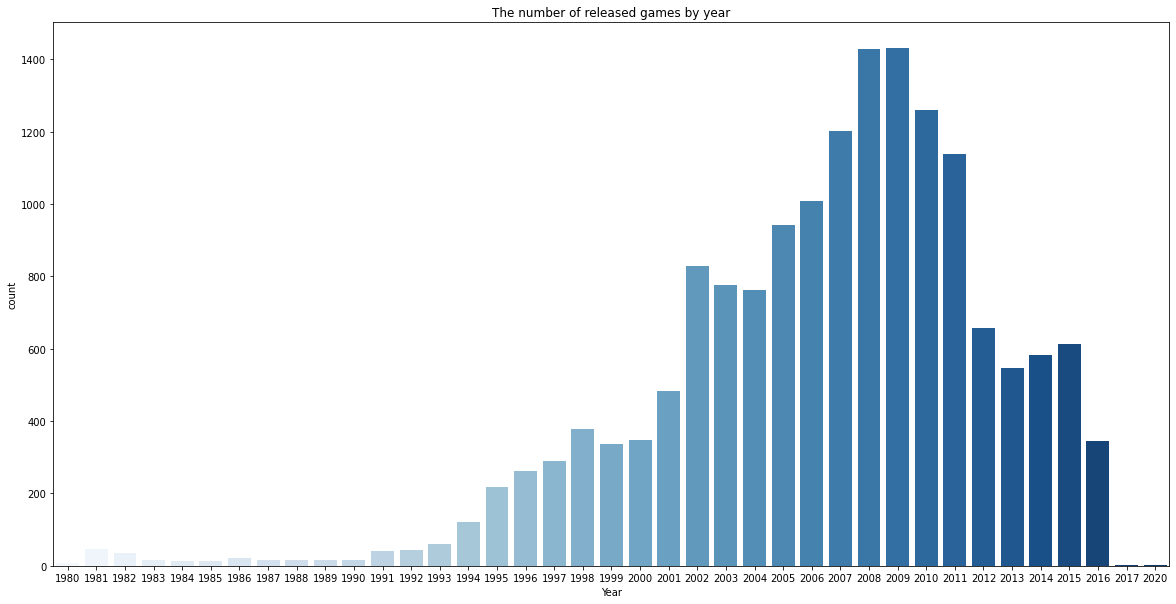

In [30]:
plt.figure(figsize=(20,10))

sns.barplot(data=df, x='Year', y='count', palette='Blues')
plt.title('The number of released games by year')

plt.show()

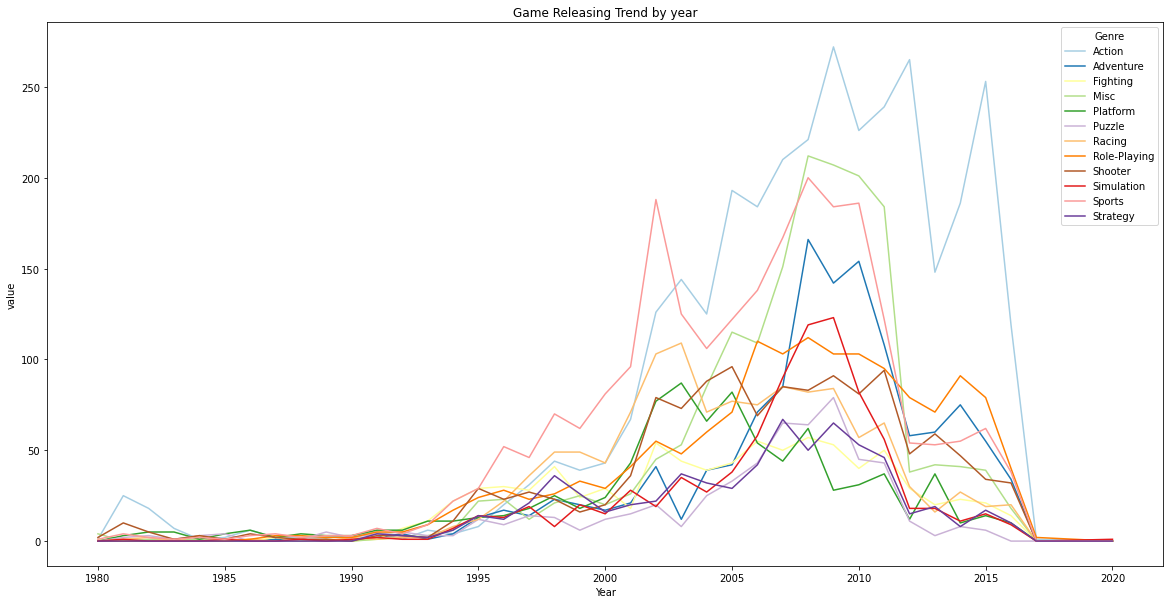

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(data=melted_data, x='Year',y='value', hue='Genre', ci=None, palette=palette)
plt.title('Game Releasing Trend by year')
plt.show()

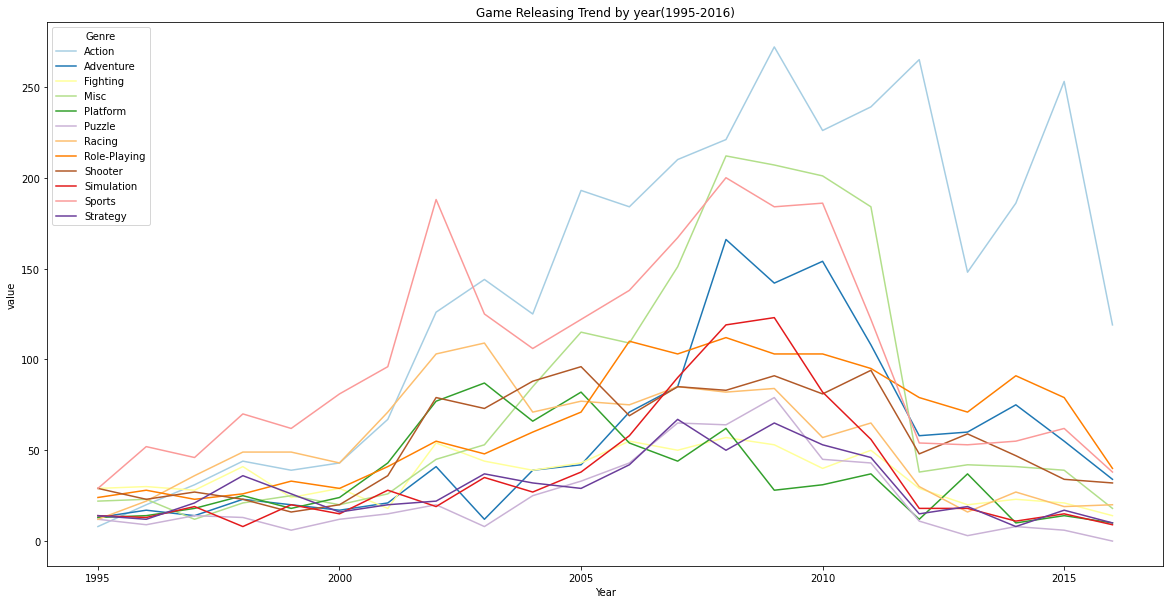

In [32]:
con = (melted_data['Year']>1994) & (melted_data['Year']<2017)

plt.figure(figsize=(20,10))
sns.lineplot(data=melted_data[con], x='Year',y='value', hue='Genre', ci=None, palette=palette)
plt.title('Game Releasing Trend by year(1995-2016)')
plt.show()

<Figure size 432x288 with 0 Axes>

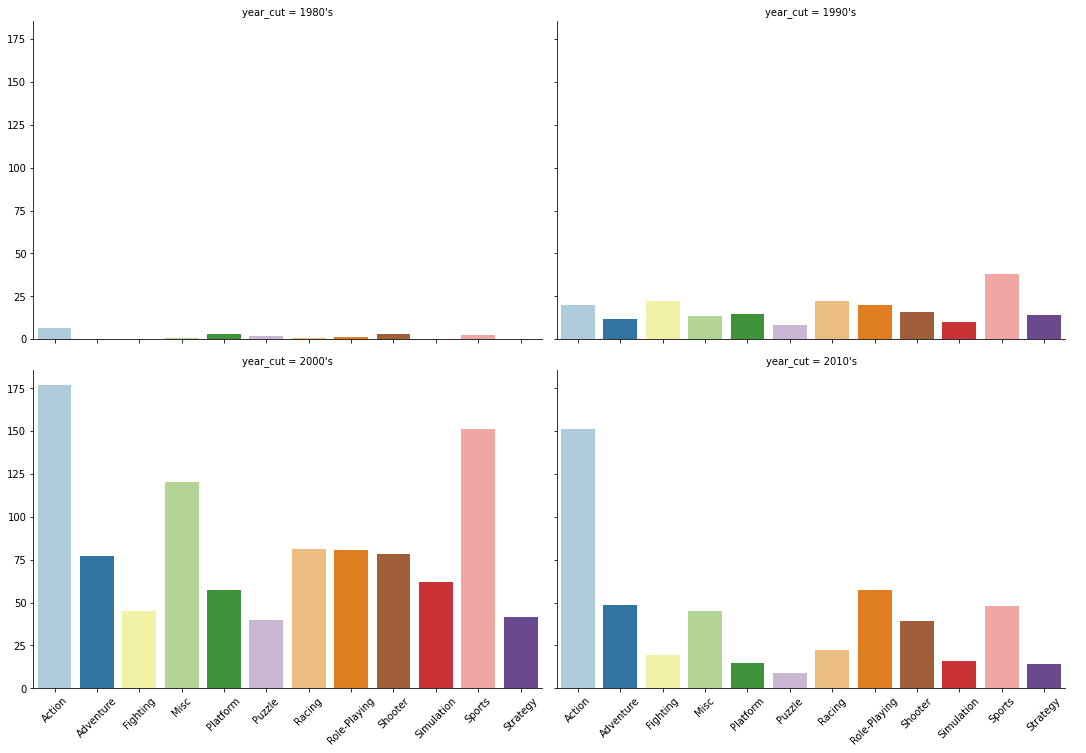

In [33]:
#시대별 장르 트렌드 막대그래프

fig = plt.figure()

g = sns.FacetGrid(data = melted_data, col = 'year_cut',height=5, aspect=1.5, col_wrap=2)


g.map_dataframe(
    sns.barplot,
    x = 'Genre',
    y = 'value',
    ci=None, palette=palette,
    data = melted_data
)


g.set_xticklabels(rotation=45)
g.add_legend()

plt.show()


In [ ]:
#연도별 플랫폼 
year_platform = n_vgames[['Name','series','Year','year_cut']]
year_platform=year_platform.pivot_table(index=['Year','year_cut'], columns='series', values='Name', aggfunc='count', fill_value=0).reset_index()
year_platform

In [35]:
a=pd.melt(year_platform, id_vars=['Year','year_cut'])

<Figure size 432x288 with 0 Axes>

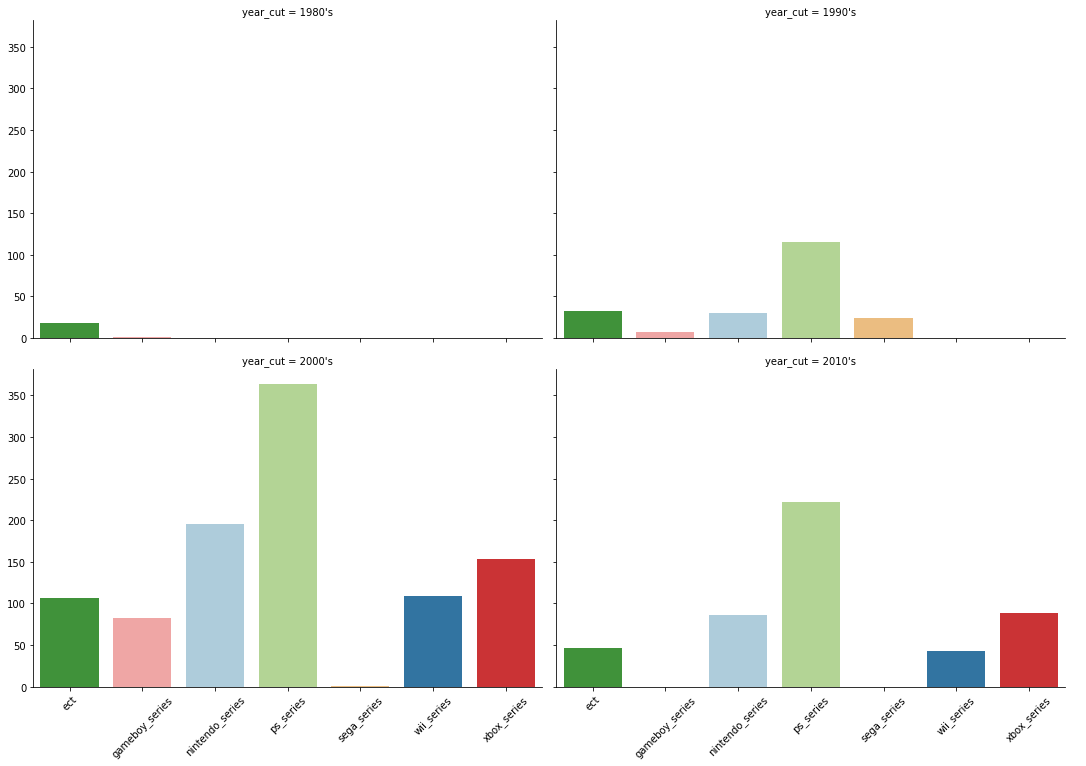

In [36]:
fig = plt.figure()

g = sns.FacetGrid(data = a, col = 'year_cut',height=5, aspect=1.5, col_wrap=2)


g.map_dataframe(
    sns.barplot,
    x = 'series',
    y='value', ci=None,
 palette=palette_p,
    data = a
)


g.set_xticklabels(rotation=45)
g.add_legend()

plt.show()




##Platform

In [37]:
#가장 많이 사용되는 플랫폼은?

agg = a.groupby(['series']).agg(np.sum)
agg=agg.sort_values(by='value', ascending=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

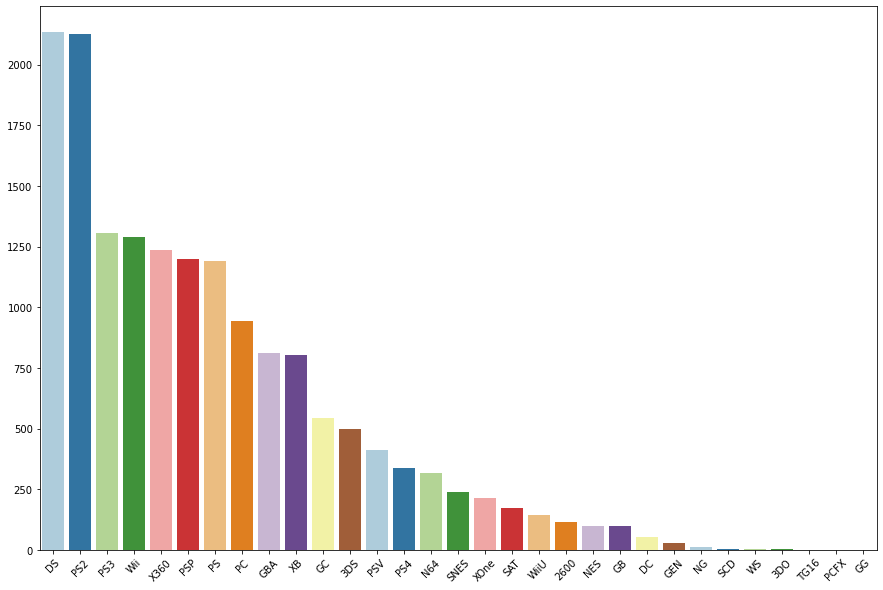

In [167]:
x=n_vgames.groupby('Platform').agg('count').sort_values('Name', ascending=False)
x
plt.figure(figsize=(15,10))
sns.barplot(data=x, x=x.index, y='Name', palette='Paired')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

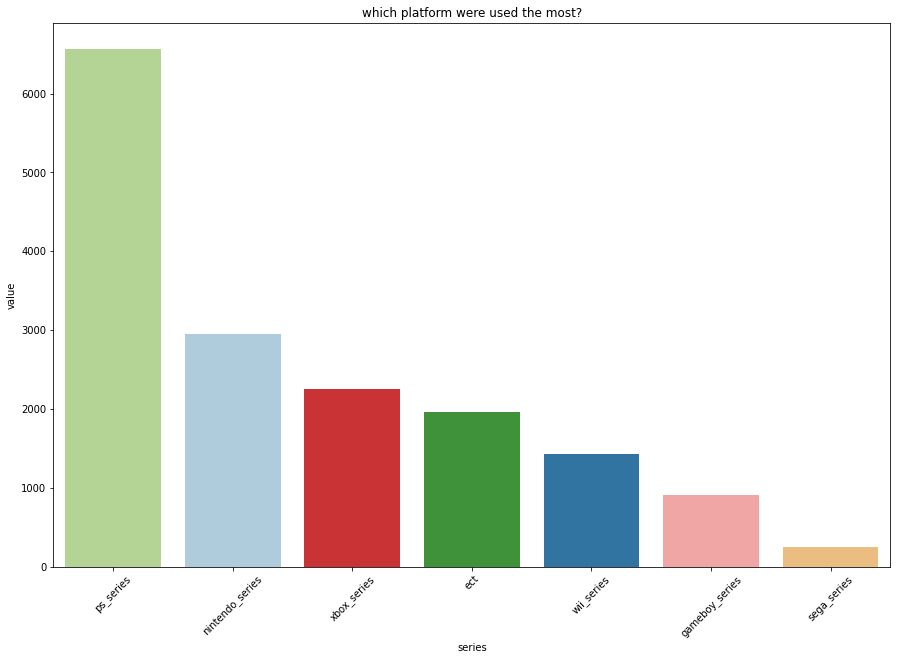

In [168]:
plt.figure(figsize=(15,10))
sns.barplot(data=agg, x=agg.index, y='value', palette=palette_p,
)
plt.xticks(rotation=45)
plt.title('which platform were used the most?')
plt.show()

<Figure size 432x288 with 0 Axes>

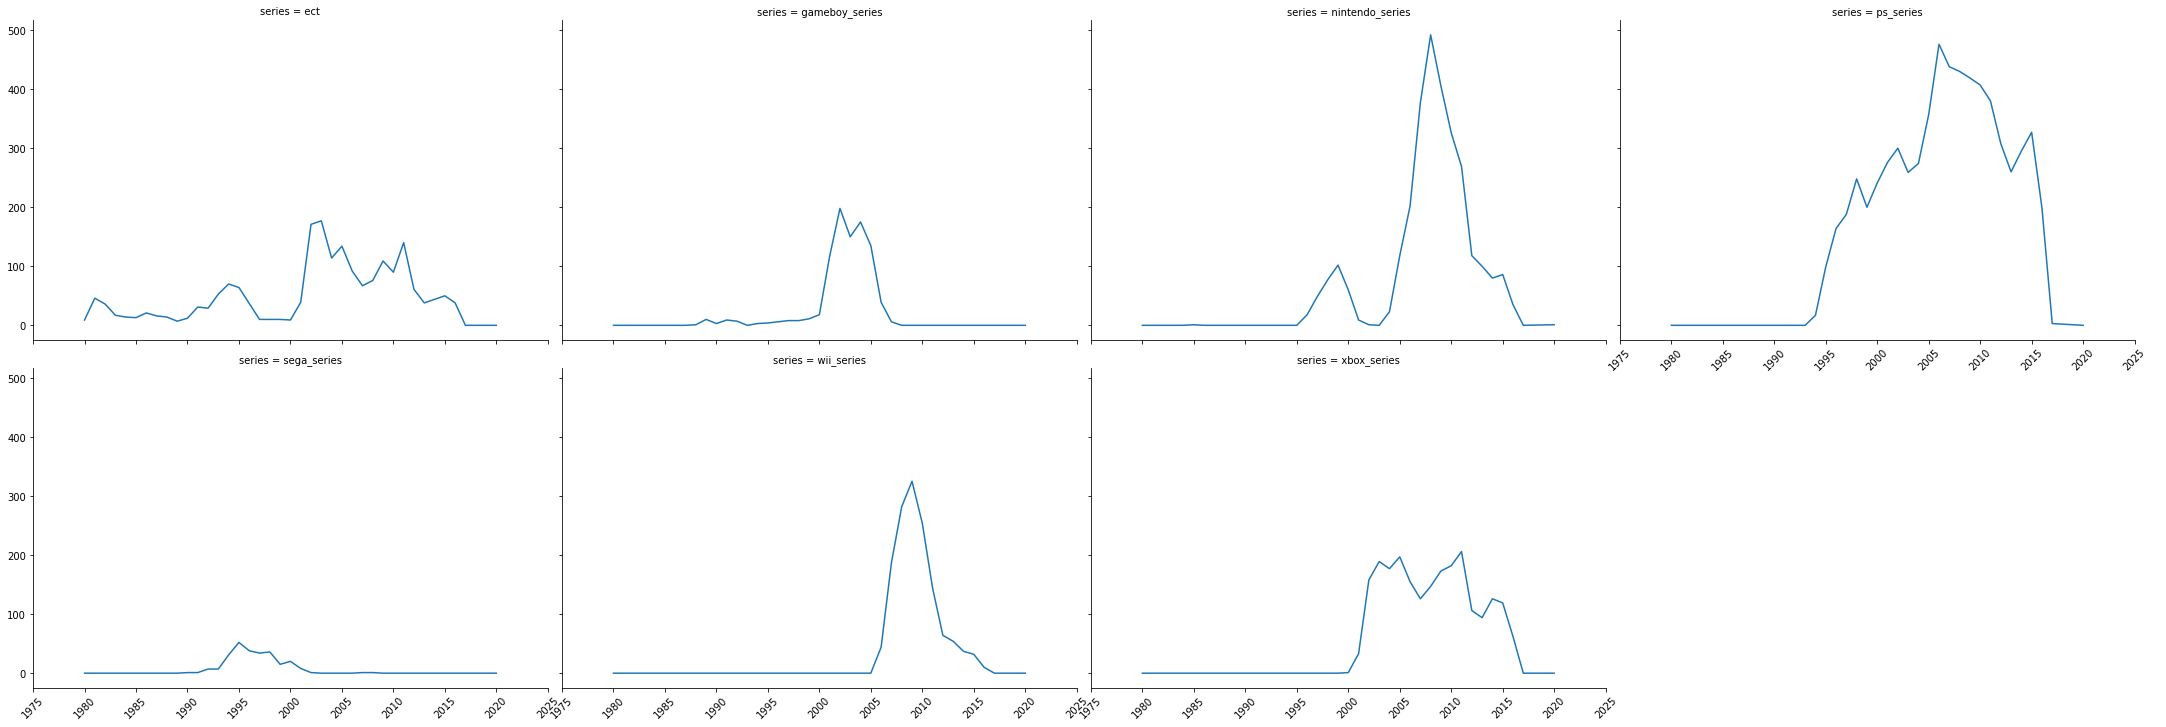

In [87]:
fig = plt.figure()

g = sns.FacetGrid(data = a, col = 'series', height=5, aspect=1.5, col_wrap=4)


g.map_dataframe(
    sns.lineplot,
    x = 'Year',
    y = 'value',
    ci=None, palette=palette_p,
    data = a
    
)
g.set_xticklabels(rotation=45)

g.add_legend()

plt.show()


##Genre

In [88]:
df = n_vgames.groupby('Genre').agg('count').reset_index().sort_values(by='Name', ascending=False)


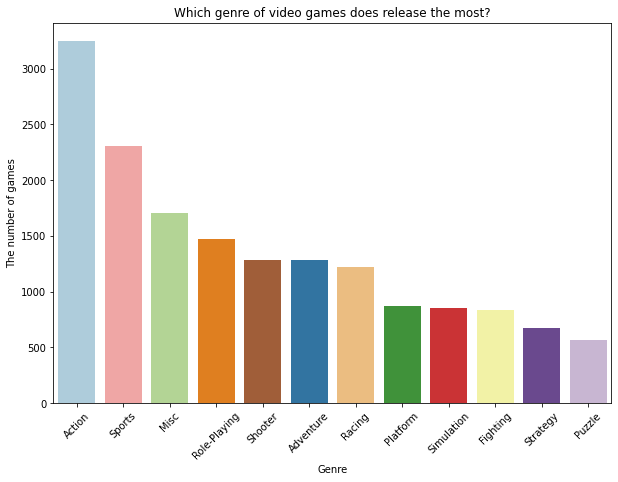

In [89]:
#가장 많이 출시된 장르는?
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='Genre', y='Name', palette=palette)
plt.xlabel('Genre')
plt.ylabel('The number of games')
plt.title('Which genre of video games does release the most?')
plt.xticks(rotation=45)
plt.show()
#게임 장르 중에서 Action이 가장 많이 출시되었고 그 다음으로 스포츠, 음악, 롤 플레이 순으로 이어짐

In [41]:
#total sales 기준 순위 
genre_sales_mean=n_vgames.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'],aggfunc=np.mean).reset_index()
genre_sales_sum=n_vgames.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'],aggfunc=np.sum).reset_index()

In [45]:
#year_avg 기준 순위 
genre_yearavg_mean = n_vgames.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','year_avg'],aggfunc=np.mean).reset_index()
genre_yearavg_sum = n_vgames.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','year_avg'],aggfunc=np.sum).reset_index()

In [46]:
#가장 많이 팔린 게임은? 순위를 매길 때 연평균 판매량과 총 판매량의 차이가 클까?

#연평균 판매량과 총 판매량의 순위 차이 
#1. 게임 전체 순위
samp1 = n_vgames.sort_values(by='Total_Sales', ascending=False)['Name']
samp2 = n_vgames.sort_values(by='year_avg', ascending=False)['Name']

#2. 장르별 판매량 합계 순위
samp3 = genre_sales_sum.sort_values(by='Total_Sales', ascending=False)['Genre']
samp4 = genre_yearavg_sum.sort_values(by='year_avg', ascending=False)['Genre']

#3. 장르별 판매량 평균 순위
samp5 = genre_sales_mean.sort_values(by='Total_Sales', ascending=False)['Genre']
samp6 = genre_yearavg_mean.sort_values(by='year_avg', ascending=False)['Genre']

In [47]:
from scipy.stats import spearmanr

print(spearmanr(samp1, samp2))
print(spearmanr(samp3, samp4))
print(spearmanr(samp5, samp6))

#전체 게임 순위의 차이는 상관관계가 없는 것으로 나오지만 이들을 장르로 그룹화 했을 때는 꽤 높은 상관관계를 보이며 통계적으로도 유의하다.
#따라서 장르를 그룹화 해서 분석 할 때는 하나의 데이터만 사용하면 될 것.
#판매량이 누적인 것을 감안할 때 누적데이터를 비교하는 것보다는 연평균 판매량을 기준으로 하는 것이 더 fair해 보인다.
#가장 많이 팔린 장르를 찾을 때에 연평균 판매량 순위를 기준으로 한다. 

SpearmanrResult(correlation=0.015065575788827243, pvalue=0.054229585314872215)
SpearmanrResult(correlation=0.8811188811188813, pvalue=0.00015267406467669873)
SpearmanrResult(correlation=0.6713286713286714, pvalue=0.016831456186893395)


<function matplotlib.pyplot.show>

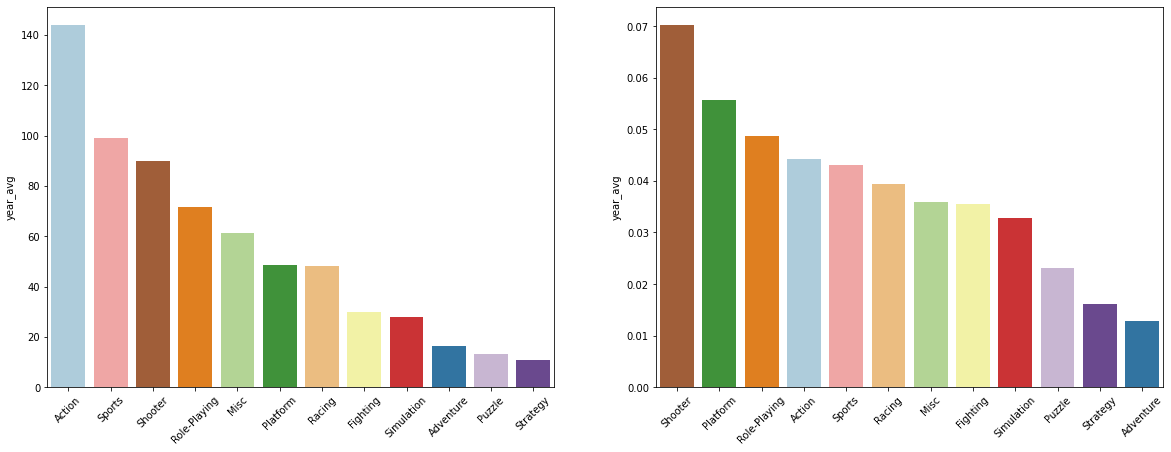

In [48]:
fig = plt.figure()
(ax1, ax2) = fig.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,7)

sns.barplot(data=genre_yearavg_sum.sort_values(by='year_avg', ascending=False), x='Genre', y='year_avg',ax=ax1, palette=palette)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('')


sns.barplot(data=genre_yearavg_mean.sort_values(by='year_avg', ascending=False), x='Genre', y='year_avg',ax=ax2, palette=palette)
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45)
ax2.set_xlabel('')


plt.show

## Analysis of best sellers
출고량이 높은 게임에 대한 분석 및 시각화 프로세스
총 판매량/연평균 판매량 상위 5%

 - 어떤 장르가 많이 팔렸나
 - 어떤 플랫폼이 많이 팔렸나
 - 어느 지역에서 많이 팔렸나

In [52]:
#K-Mean clustering을 통해서 판매량 high, middle low 결정하기 - 기준은 연평균 판매량

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

df=n_vgames[['year_avg']]
scaled_df = StandardScaler().fit_transform(df)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
pred = kmeans.labels_

n_vgames['rank']=pred
n_vgames.sort_values('year_avg')
n_vgames['rank'].value_counts()

0    15685
1      586
2       56
Name: rank, dtype: int64

In [169]:
n_vgames['rank']=n_vgames['rank'].replace(2,'high').replace(1,'middle').replace(0,'low')


high=n_vgames[n_vgames['rank']=='high']
middle=n_vgames[n_vgames['rank']=='middle']
low=n_vgames[n_vgames['rank']=='low']

print(high.describe())
print(middle.describe())
print(low.describe())

              Year   NA_Sales   EU_Sales  ...  Other_Sales  Total_Sales   year_avg
count    56.000000  56.000000  56.000000  ...    56.000000    56.000000  56.000000
mean   2009.410714   7.829286   5.383393  ...     1.727321    17.187857   1.482679
std       5.923073   7.015576   4.202513  ...     1.730187    12.267507   0.728761
min    1985.000000   0.280000   0.400000  ...     0.410000     4.780000   0.920000
25%    2007.750000   3.765000   3.130000  ...     0.777500     9.715000   1.075000
50%    2011.000000   5.875000   4.285000  ...     1.275000    13.630000   1.240000
75%    2013.000000   9.175000   6.090000  ...     2.027500    21.865000   1.620000
max    2016.000000  41.490000  29.020000  ...    10.570000    82.740000   5.520000

[8 rows x 7 columns]
              Year    NA_Sales  ...  Total_Sales    year_avg
count   586.000000  586.000000  ...   586.000000  586.000000
mean   2008.919795    1.933737  ...     4.040307    0.340392
std       5.624311    1.828917  ...     2.770287

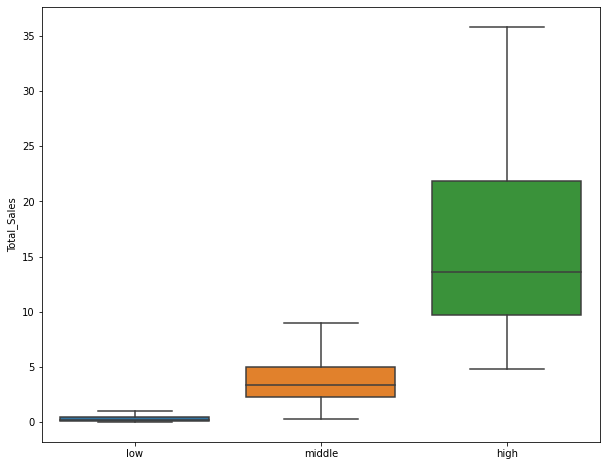

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(data=n_vgames, y='Total_Sales', x='rank', showfliers=False)
plt.xlabel('')
plt.show()

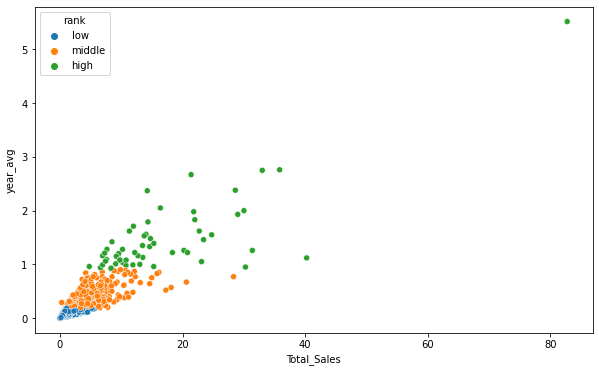

In [59]:
plt.figure(figsize=(10,6))
n_vgames['rank']=='low'
sns.scatterplot(data=n_vgames, x='Total_Sales', y='year_avg', hue='rank')
plt.show()

In [60]:
#high rank

high.describe()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,year_avg
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2009.410714,7.829286,5.383393,2.247857,1.727321,17.187857,1.482679
std,5.923073,7.015576,4.202513,2.383367,1.730187,12.267507,0.728761
min,1985.000000,0.280000,0.400000,0.000000,0.410000,4.780000,0.920000
25%,2007.750000,3.765000,3.130000,0.137500,0.777500,9.715000,1.075000
50%,2011.000000,5.875000,4.285000,1.600000,1.275000,13.630000,1.240000
75%,2013.000000,9.175000,6.090000,3.832500,2.027500,21.865000,1.620000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000,5.520000


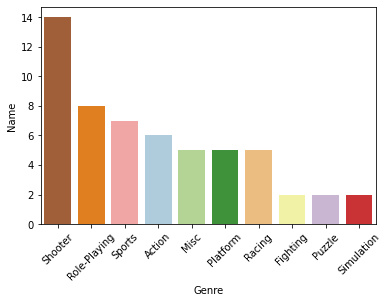

In [61]:
data=high.groupby('Genre').agg('count').sort_values(by='Name', ascending=False)
sns.barplot(data=data, x=data.index, y='Name', palette=palette)
plt.xticks(rotation=45)
plt.show()

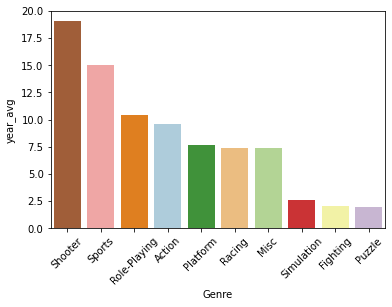

In [63]:
data=high.groupby('Genre').agg(sum).sort_values(by='year_avg', ascending=False)
sns.barplot(data=data, x=data.index, y='year_avg', palette=palette)
plt.xticks(rotation=45)
plt.show()

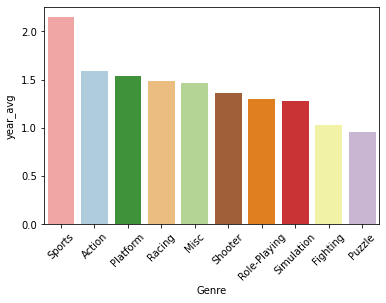

In [64]:
data=high.groupby('Genre').agg('mean').sort_values(by='year_avg', ascending=False)
sns.barplot(data=data, x=data.index, y='year_avg', palette=palette)
plt.xticks(rotation=45)
plt.show()

In [66]:
#high, middle 데이터 분석
high_middle_data = n_vgames[~(n_vgames['rank']=='low')]

In [69]:
#연평균 판매량
top_total_avg = high_middle_data.sort_values(by='year_avg',ascending=False).reset_index(drop=True)
top_total_avg
top_total_avg_sum=top_total_avg.groupby('Genre').agg(sum)
top_total_avg_sum
top_total_avg_mean=top_total_avg.groupby('Genre').agg(np.mean)

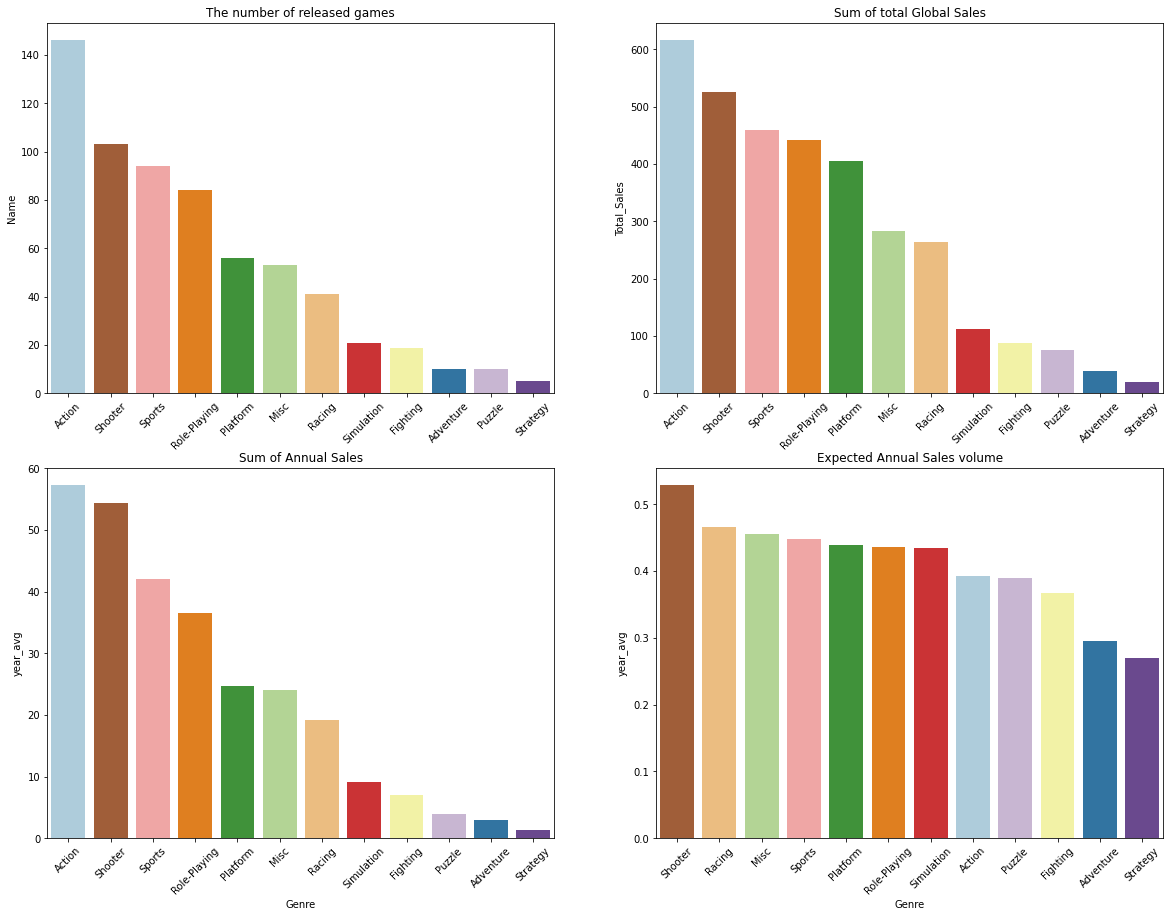

In [102]:
#많이 출시된 장르 / 누적 판매량 / 연평균 판매량의 합이 가장 많은 장르 / 기대 판매량이 가장 많은 장르
fig = plt.figure()
((ax1, ax2),(ax3, ax4)) = fig.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,15)

data = top_total_avg[['Name','Genre']].groupby('Genre').agg('count').sort_values(by='Name', ascending=False)
sns.barplot(data=data, x=data.index, y='Name', ax=ax1,palette=palette)
ax1.set_title('The number of released games')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_xlabel('')

data1=top_total_avg_sum.sort_values(by='year_avg', ascending=False)
sns.barplot(data=data1, x=data1.index, y='Total_Sales', palette=palette,ax=ax2)
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45)
ax2.set_xlabel('')
ax2.set_title('Sum of total Global Sales')

data1=top_total_avg_sum.sort_values(by='year_avg', ascending=False)
sns.barplot(data=data1, x=data1.index, y='year_avg', palette=palette,ax=ax3)
xlabels = ax3.get_xticklabels()
ax3.set_xticklabels(xlabels, rotation=45)
ax3.set_title('Sum of Annual Sales')

data2=top_total_avg_mean.sort_values(by='year_avg', ascending=False)
sns.barplot(data=data2, x=data2.index, y='year_avg', palette=palette, ax=ax4)
xlabels = ax4.get_xticklabels()
ax4.set_xticklabels(xlabels, rotation=45)
ax4.set_title('Expected Annual Sales volume')



plt.show()

In [171]:
#많이 팔린 플랫폼
data = (high_middle_data[['Name','Platform','Total_Sales', 'year_avg','series']].
        pivot_table(index=['Platform','series'], values=['Total_Sales','year_avg'], aggfunc=np.sum).
        sort_values(by='year_avg', ascending=False).
        reset_index())

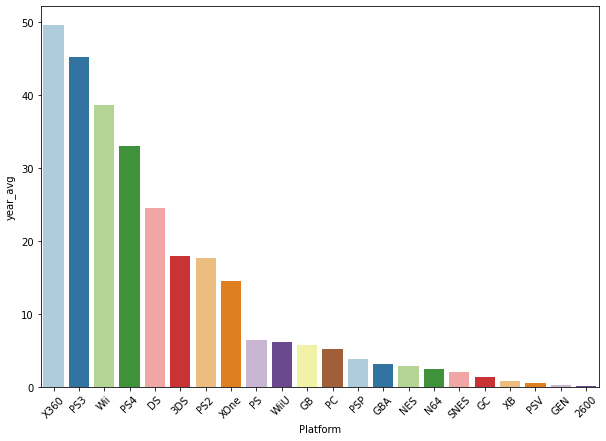

In [172]:
plt.figure(figsize=(10,7))
sns.barplot(data=data, y='year_avg', x='Platform', palette='Paired')
plt.xticks(rotation=45) 
plt.show()


In [174]:
order=data.groupby('series').agg(np.sum).sort_values('year_avg', ascending=False)['year_avg']

In [175]:
data1=data.groupby('series').agg(np.sum).sort_values('year_avg', ascending=False)

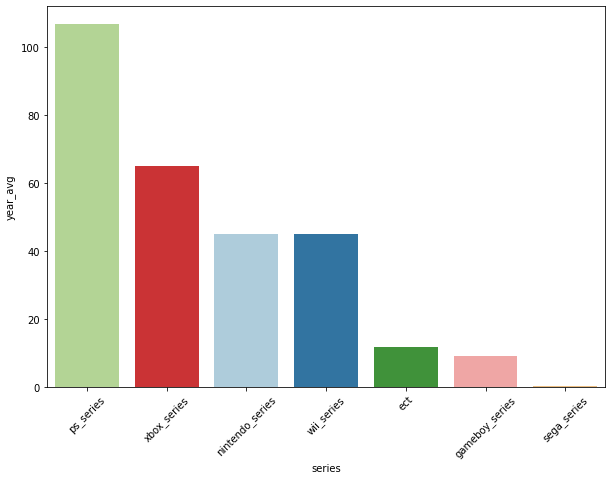

In [176]:
#플랫폼 그룹으로 봤을 때

plt.figure(figsize=(10,7))
sns.barplot(data=data1, y='year_avg', x=data1.index, palette=palette_p)
plt.xticks(rotation=45)
plt.show()


In [93]:
#어느 지역에서 가장 많이 팔렸나?

cons=objs+['Name']
melted_top = pd.melt(high_middle_data[cons], id_vars='Name')
graph_Df = melted_top.groupby('variable').agg('sum').sort_values(by='value', ascending=False)
graph_Df

,value
variable,
NA_Sales,1571.61
EU_Sales,1030.64
JP_Sales,390.42
Other_Sales,337.47


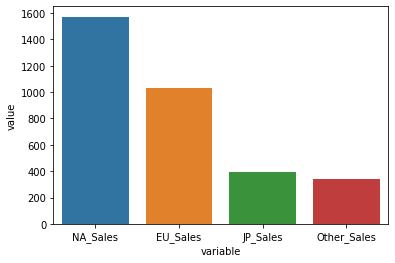

In [94]:
sns.barplot(data=graph_Df, x=graph_Df.index, y='value')
plt.show()

#미국에서 가장 많이 팔렸고 그 다음으로 유럽, 일본 -> 미국 시장이 가장 크다는 건가??

##Difference among regions
지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

In [103]:
region_data=n_vgames[['series','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [104]:
region_data.head()

,series,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,nintendo_series,Action,0.04,0.00,0.00,0.00
1,wii_series,Action,0.17,0.00,0.00,0.01
2,ps_series,Adventure,0.00,0.00,0.02,0.00
3,nintendo_series,Misc,0.04,0.00,0.00,0.00
4,ps_series,Platform,0.12,0.09,0.00,0.04


In [113]:
region_data['NA_Sales'].mean()

0.2654149568199986

In [105]:
melt_Df = pd.melt(region_data, id_vars=['series','Genre'])

In [189]:
data=melt_Df.groupby('variable').agg(np.sum).sort_values(by='value', ascending=False)
data.values/data.values.sum()

array([[0.49154932],
       [0.27327113],
       [0.14568063],
       [0.08949893]])

Text(0, 0.25, '0.26')

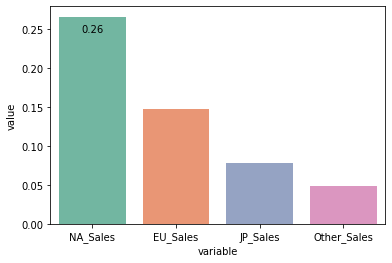

In [126]:
sns.barplot(data=melt_Df, x='variable', y='value', ci=None, palette='Set2')
plt.text(0,0.25, 0.26,
         ha='center',
         va='center')

Text(0.5, 1.0, 'Cumulative Sales by Regions')

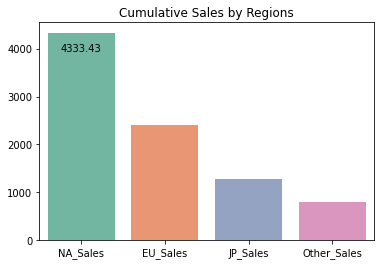

In [128]:
#누적 판매량


sns.barplot(data=data, x=data.index, y='value', ci=None, palette='Set2')
plt.text(0,4000, 4333.43,
         ha='center',
         va='center')
plt.xlabel('')
plt.ylabel('')
plt.title('Cumulative Sales by Regions')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

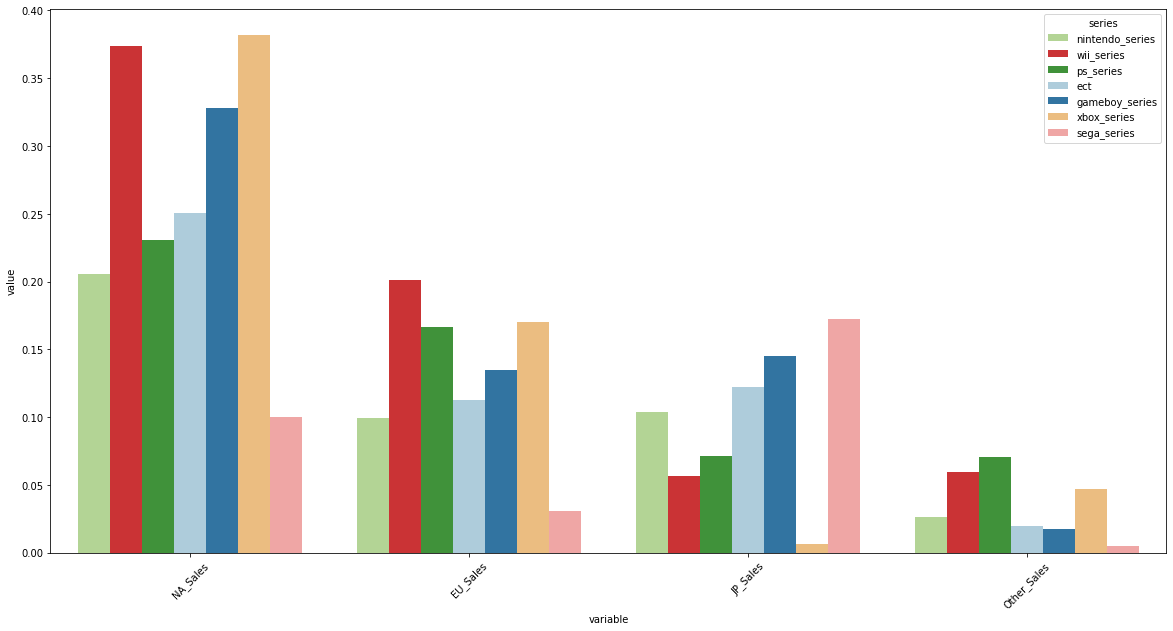

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(data=melt_Df, x='variable', y='value', hue='series', palette=palette_p, ci=None)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

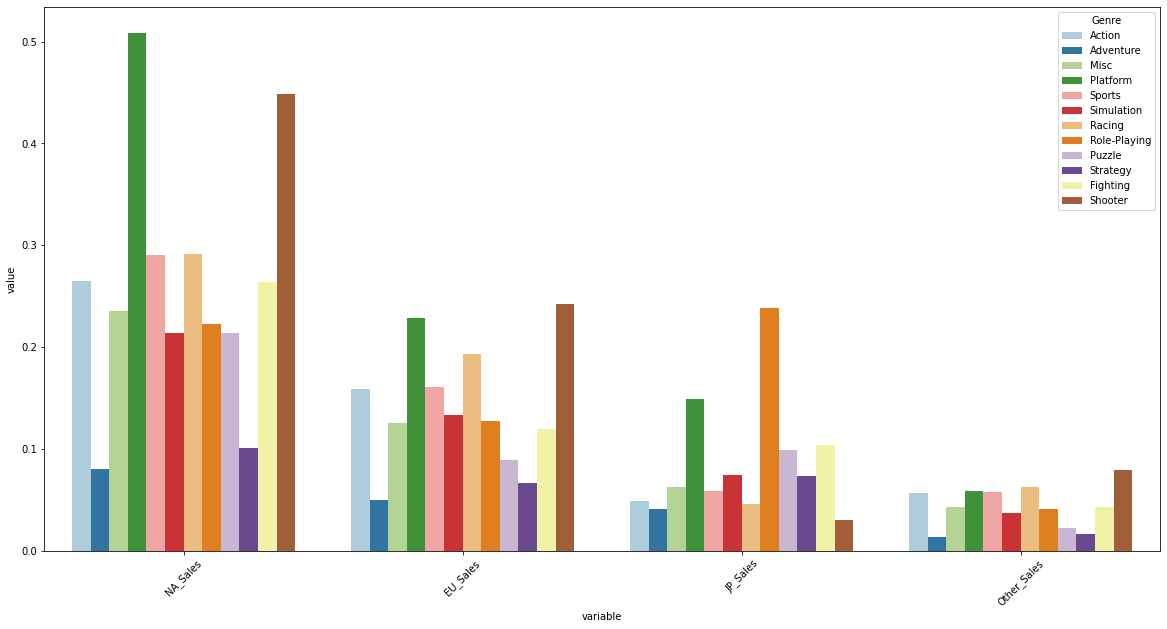

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(data=melt_Df, x='variable', y='value', hue='Genre', ci=None, palette=palette)
plt.xticks(rotation=45)

<Figure size 432x288 with 0 Axes>

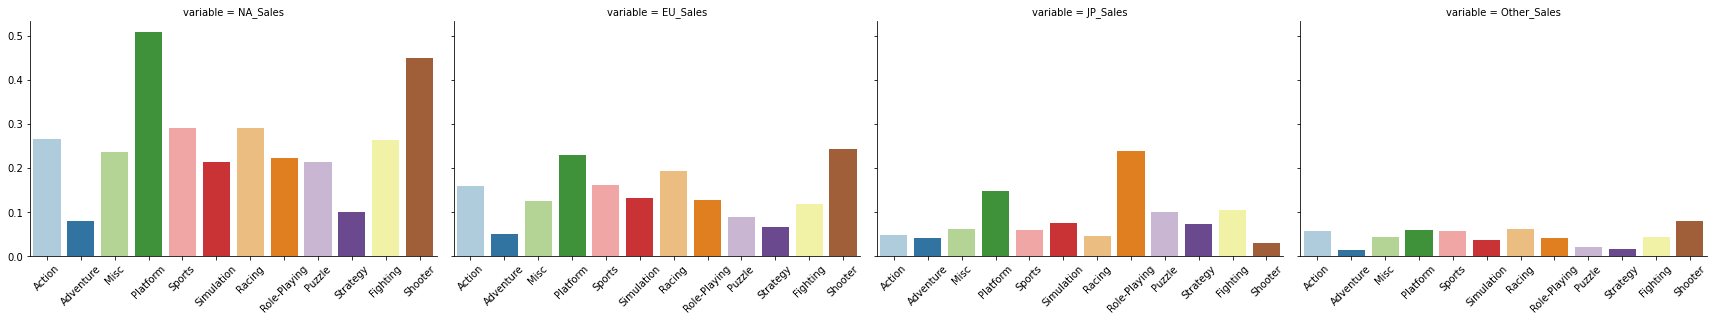

In [195]:
fig = plt.figure()

g = sns.FacetGrid(data = melt_Df, col = 'variable',height=4, aspect=1.5)


g.map_dataframe(
    sns.barplot,
    x = 'Genre',
    y = 'value',
    ci=None, palette=palette,
    data = melt_Df
)


g.set_xticklabels(rotation=45)
g.add_legend()

plt.show()

#지역별로 선호하는 장르가 다름

<Figure size 432x288 with 0 Axes>

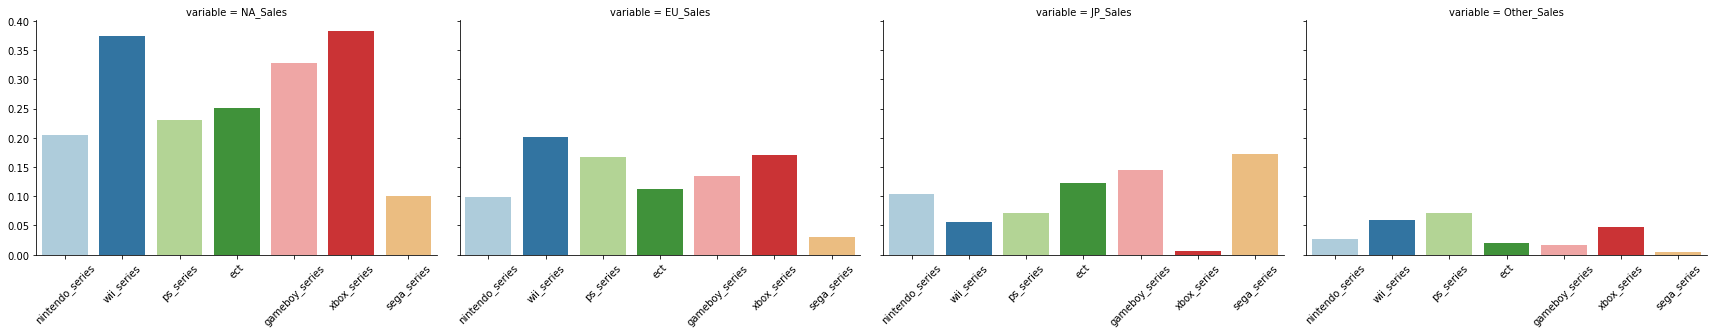

In [197]:
fig = plt.figure()

g = sns.FacetGrid(data = melt_Df, col = 'variable',height=4, aspect=1.5)


g.map_dataframe(
    sns.barplot,
    x = 'series',
    y = 'value',
    ci=None, palette=palette_p,
    data = melt_Df
)


g.set_xticklabels(rotation=45)
g.add_legend()

plt.show()

#지역별로 선호하는 플랫폼이 다름 

In [130]:
publisher = pd.DataFrame(n_vgames['Publisher'].value_counts())

In [131]:
publisher_10 = publisher.head(10)
publisher_10.Publisher.sum()/len(n_vgames)

0.4966007227292215

In [132]:
publishers_10_sales=pd.DataFrame(n_vgames.groupby('Publisher').agg('sum').sort_values(by='Total_Sales', ascending=False).head(10)['Total_Sales'])
(publishers_10_sales.Total_Sales.sum()/n_vgames.Total_Sales.sum())*100

70.57042648136421

In [ ]:
a=n_vgames[n_vgames['Publisher'].isin(publishers_10_sales.index)]
a = a.pivot_table(values='Name', index='Year', columns='Publisher', aggfunc='count', fill_value=0).reset_index()

#a=pd.melt(a, id_vars='Year')
a

In [ ]:
n_vgames[n_vgames['Publisher']=='Electronic Arts'].groupby(['Platform']).agg('sum').sort_values(by='Total_Sales', ascending=False).head(50)

In [ ]:
n_vgames[n_vgames['Publisher']=='Electronic Arts']#.groupby('Platform').agg('count').sort_values(by='Name', ascending=False)

In [135]:
n_vgames[n_vgames['Publisher']=='Ubisoft']#.groupby('Genre').agg('count').sort_values(by='Name', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,year_avg,year_cut,series,rank
11,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.14,0.05,0.00,0.00,0.19,0.01,2000's,gameboy_series,low
83,Tom and Jerry in Fists of Furry,N64,2000,Fighting,Ubisoft,0.13,0.03,0.00,0.00,0.16,0.01,1990's,nintendo_series,low
89,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0.00,0.02,0.11,0.01,2000's,ps_series,low
97,Red Steel 2,Wii,2010,Shooter,Ubisoft,0.36,0.21,0.01,0.06,0.64,0.06,2000's,wii_series,low
100,Where's Waldo? The Fantastic Journey,Wii,2009,Adventure,Ubisoft,0.18,0.00,0.00,0.01,0.19,0.02,2000's,wii_series,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16199,Tom Clancy's Splinter Cell: Double Agent,X360,2006,Action,Ubisoft,0.67,0.05,0.01,0.06,0.79,0.05,2000's,xbox_series,low
16236,Batman: Rise of Sin Tzu,XB,2003,Action,Ubisoft,0.08,0.02,0.00,0.00,0.10,0.01,2000's,xbox_series,low
16246,Open Season,DS,2006,Platform,Ubisoft,0.12,0.00,0.00,0.01,0.13,0.01,2000's,nintendo_series,low
16259,Star Wars Episode III: Revenge of the Sith,DS,2005,Action,Ubisoft,0.25,0.03,0.00,0.03,0.31,0.02,2000's,nintendo_series,low


In [140]:
n_vgames.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales', 'year_avg',
       'year_cut', 'series', 'rank'],
      dtype='object')

In [141]:
len(n_vgames.series.unique())

7

In [142]:
n_vgames.series.unique()

array(['nintendo_series', 'wii_series', 'ps_series', 'ect',
       'gameboy_series', 'xbox_series', 'sega_series'], dtype=object)

In [143]:
print(n_vgames.Year.min(), n_vgames.Year.max())

1980 2020


##기대 판매량

In [144]:
#기대 판매량

data=n_vgames.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales','year_avg'], aggfunc=np.mean, fill_value=0).sort_values(by='year_avg', ascending=False)
data_order=n_vgames.pivot_table(index='Genre',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales','year_avg'], aggfunc=np.mean, fill_value=0).sort_values(by='year_avg', ascending=False).index

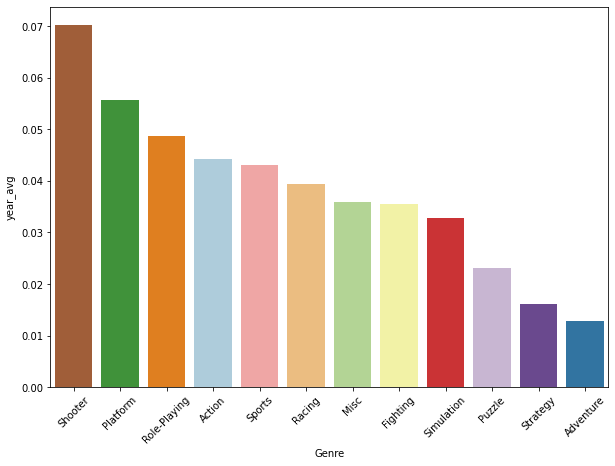

In [145]:
plt.figure(figsize=(10,7))
sns.barplot(data=data, x=data.index, y='year_avg', palette=palette)
plt.xticks(rotation=45)
plt.show()

In [159]:
n_vgames.loc[n_vgames['Genre']=='Shooter','Total_Sales']

27       0.29
31       0.16
43       0.93
60       0.48
63       0.01
         ... 
16279    0.52
16280    0.22
16281    3.51
16313    0.06
16317    0.18
Name: Total_Sales, Length: 1282, dtype: float64

In [ ]:
test_data=data['Total_Sales']
test_data

In [147]:
from scipy.stats import chisquare, ttest_1samp, f_oneway, ttest_ind, chi2_contingency


In [148]:
n_vgames.loc[n_vgames['Genre']=='Shooter','Total_Sales']

27       0.29
31       0.16
43       0.93
60       0.48
63       0.01
         ... 
16279    0.52
16280    0.22
16281    3.51
16313    0.06
16317    0.18
Name: Total_Sales, Length: 1282, dtype: float64

In [149]:
f_oneway(n_vgames.loc[n_vgames['Genre']=='Shooter','Total_Sales'],
         n_vgames.loc[n_vgames['Genre']=='Platform','Total_Sales'],
         n_vgames.loc[n_vgames['Genre']=='Action','Total_Sales'],
         n_vgames.loc[n_vgames['Genre']=='Adventure','Total_Sales'],
         n_vgames.loc[n_vgames['Genre']=='Role-Playing','Total_Sales'],
          n_vgames.loc[n_vgames['Genre']=='Sports','Total_Sales'],
          n_vgames.loc[n_vgames['Genre']=='Racing','Total_Sales'],
          n_vgames.loc[n_vgames['Genre']=='Misc','Total_Sales'], 
         n_vgames.loc[n_vgames['Genre']=='Fighting','Total_Sales'],
          n_vgames.loc[n_vgames['Genre']=='Simulation','Total_Sales'],
          n_vgames.loc[n_vgames['Genre']=='Puzzle','Total_Sales'],
          n_vgames.loc[n_vgames['Genre']=='Strategy','Total_Sales'],)

F_onewayResult(statistic=18.250205912236943, pvalue=9.081691473767245e-37)

In [150]:
#pvalue가 0.05보다 낮게 나옴 -> 이것들은 유의미한 차이가 있음

In [151]:
ttest_ind(n_vgames.loc[n_vgames['Genre']=='Shooter','Total_Sales'],
         n_vgames.loc[n_vgames['Genre']=='Role-Playing','Total_Sales'])
#1등과 3등은 유의미한 차이가 있음 

Ttest_indResult(statistic=2.530818369058198, pvalue=0.01143493942047396)

In [152]:
tab=pd.crosstab(n_vgames['series'],n_vgames['Genre'])
tab

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
series,,,,,,,,,,,,
ect,339,93,88,83,148,73,135,195,233,138,229,214
gameboy_series,168,42,23,118,157,54,66,94,41,23,97,25
nintendo_series,552,279,79,459,148,268,133,288,72,318,250,103
ps_series,1350,656,436,558,256,100,539,719,485,216,1018,232
sega_series,9,39,48,16,15,5,15,24,26,8,29,19
wii_series,293,86,46,293,75,57,94,41,71,85,264,28
xbox_series,538,85,116,182,77,13,243,112,354,63,417,51


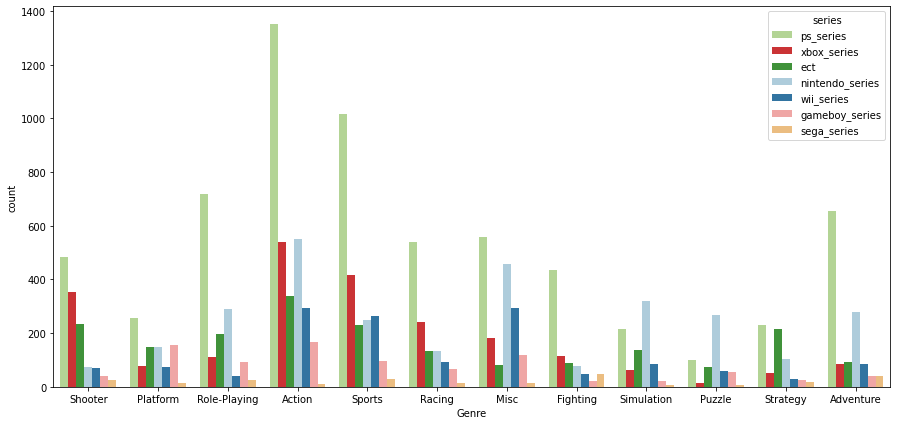

In [156]:
plt.figure(figsize=(15,7))
sns.countplot(data=n_vgames, x='Genre', hue='series', palette=palette_p, hue_order=order, order=data_order)

plt.show()

### shooter analysis

In [131]:
n_vgames[n_vgames['Genre']=='Shooter'].sort_values('Total_Sales', ascending=False).head(50)['Name'].reset_index(drop=True).str.contains('Call').sum()

21

In [132]:
shooter=n_vgames[n_vgames['Genre']=='Shooter']
shooter_region=shooter[['Name','series','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
shooter_region=pd.melt(shooter_region, id_vars=['Name','series'])
shooter_region

,Name,series,variable,value
0,World of Tanks,ect,NA_Sales,0.00
1,Project Sylpheed: Arc of Deception,xbox_series,NA_Sales,0.12
2,Crysis 3,xbox_series,NA_Sales,0.51
3,Unreal Tournament III,xbox_series,NA_Sales,0.25
4,SD Gundam Force,gameboy_series,NA_Sales,0.01
...,...,...,...,...
5123,Syphon Filter 3,ps_series,Other_Sales,0.03
5124,BloodRayne,xbox_series,Other_Sales,0.01
5125,Left 4 Dead,xbox_series,Other_Sales,0.30
5126,Bionicle Heroes,nintendo_series,Other_Sales,0.00


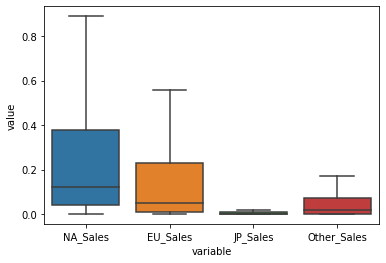

In [133]:
#지역별 shooter 판매량 boxplot
sns.boxplot(data=shooter_region, x='variable', y='value', showfliers=False)

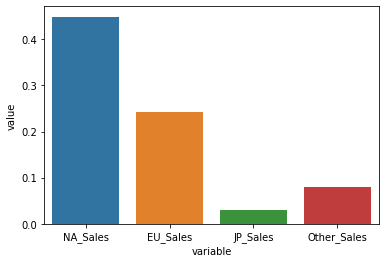

In [201]:
sns.barplot(data=shooter_region, x='variable', y='value', ci=None)

In [134]:
from scipy.stats import f_oneway

na = shooter_region.loc[shooter_region['variable']=='NA_Sales', 'value']
eu = shooter_region.loc[shooter_region['variable']=='EU_Sales', 'value']
jp = shooter_region.loc[shooter_region['variable']=='JP_Sales', 'value']
other = shooter_region.loc[shooter_region['variable']=='Other_Sales', 'value']

f_oneway(na, eu, jp, other).pvalue #0보다 작음 세 지역의 판매량이 유의미하게 차이가 남. 따라서 지역에 따른 마케팅 전략이 필요함 

4.7777947433885104e-63

<Figure size 432x288 with 0 Axes>

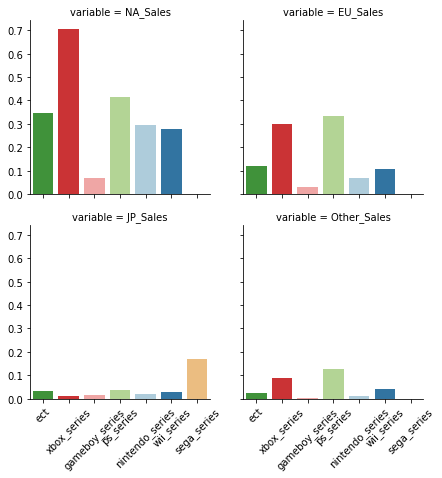

In [180]:
fig = plt.figure()

g = sns.FacetGrid(data = shooter_region, col = 'variable',height=3, aspect=1, col_wrap=2)


g.map_dataframe(
    sns.barplot,
    x = 'series',
    y = 'value',
    ci=None, palette=palette_p,
    data = shooter_region
)


g.set_xticklabels(rotation=45)
g.add_legend()

plt.show() #플랫폼은 두개 xbox, ps 

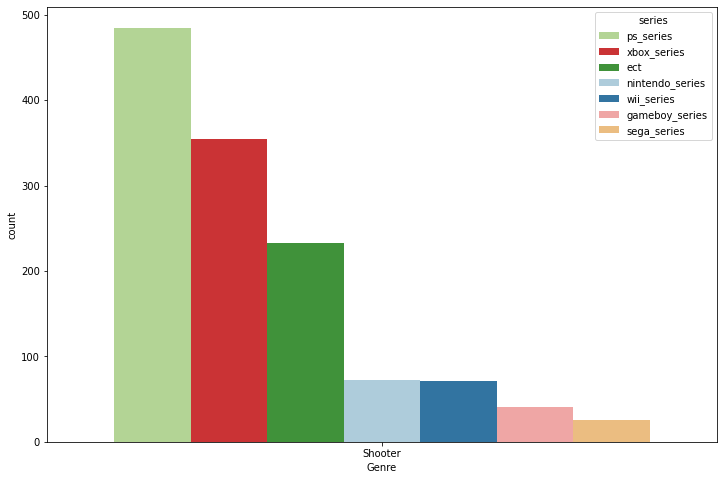

In [178]:
plt.figure(figsize=(12,8))
order=n_vgames[n_vgames['Genre']=='Shooter'].groupby('series').agg('count').sort_values(by='Name', ascending=False).index
sns.countplot(data=n_vgames[n_vgames['Genre']=='Shooter'], x='Genre', hue='series', palette=palette_p, hue_order=order)


In [184]:
bar=shooter.groupby('series').agg('count').sort_values('Name', ascending=False)

Text(0, 0.5, '')

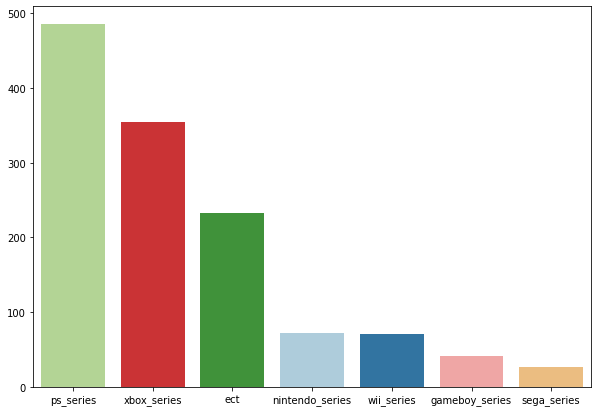

In [185]:
plt.figure(figsize=(10,7))
sns.barplot(data=bar, x=bar.index, y='Name', palette=palette_p)
plt.xlabel('')
plt.ylabel('')